# [RAVDESS Dataset](https://zenodo.org/record/1188976#.YuauP3VfiV5) 
## The Ryerson Audio-Visual Database of Emotional Speech and Song

Data used for this project :
+ Video_Speech_Actor_01.zip
+ Video_Speech_Actor_02.zip
+ Video_Speech_Actor_03.zip
+ Video_Speech_Actor_04.zip
+ Video_Speech_Actor_05.zip
+ Video_Speech_Actor_06.zip
+ Video_Speech_Actor_07.zip
+ Video_Speech_Actor_08.zip
+ Video_Speech_Actor_09.zip
+ Video_Speech_Actor_10.zip
+ Video_Speech_Actor_11.zip
+ Video_Speech_Actor_12.zip
+ Video_Speech_Actor_13.zip
+ Video_Speech_Actor_14.zip
+ Video_Speech_Actor_15.zip
+ Video_Speech_Actor_16.zip
+ Video_Speech_Actor_17.zip
+ Video_Speech_Actor_18.zip
+ Video_Speech_Actor_19.zip
+ Video_Speech_Actor_20.zip
+ Video_Speech_Actor_21.zip
+ Video_Speech_Actor_22.zip
+ Video_Speech_Actor_23.zip
+ Video_Speech_Actor_24.zip

### Setting paths

In [3]:
input_dir = '../data/01/compressed'
output_dir = '../data/01/uncompressed'
output_images_dir = '../data/02'

## Filename identifiers

+ Modality
  + 01 = full-AV
  + 02 = video-only
  + 03 = audio-only
+ Vocal channel
  + 01 = speech
  + 02 = song
+ Emotion
  + 01 = neutral
  + 02 = calm
  + 03 = happy
  + 04 = sad
  + 05 = angry
  + 06 = fearful
  + 07 = disgust
  + 08 = surprised
+ Emotional intensity
  + 01 = normal
  + 02 = strong
  > NOTE: There is no strong intensity for the 'neutral' emotion.
+ Statement
  + 01 = "Kids are talking by the door"
  + 02 = "Dogs are sitting by the door"
+ Repetition
  + 01 = 1st repetition
  + 02 = 2nd repetition
+ Actor
  + 01 to 24.
  + Odd numbered actors are male
  + even numbered actors are female

In [39]:
# Dict of emotions paired with filename identifiers
emotions = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised",
}

In [4]:
import os

# Get the list of zip files
zips = list(filter(lambda x: x.endswith('.zip'), os.listdir(input_dir)))

In [41]:
import cv2

def extract_frames(video, output_dir):
    """Extract frames from a video file.

    Args:
        video (str): path of the video
        output_dir (str): path of the output dir
    """
    folder_name = video.split('/')[-2]
    vidcap = cv2.VideoCapture(video)
    # Grabs, decodes and returns the next video frame.
    # Returns False if no frame has been grabbed.
    success, image = vidcap.read()
    count = 0
    while success:
        filename = f"{folder_name}_{count}.jpg"
        output_file = os.path.join(output_dir, filename)
        cv2.imwrite(output_file, image)     # save frame as JPEG file      
        success, image = vidcap.read()
        count += 1

In [45]:
import zipfile
import cv2
import shutil
from tqdm import tqdm

# Loop through list of zips
for zip in tqdm(zips):
    with zipfile.ZipFile(os.path.join(input_dir, zip), 'r') as zip_ref:
        folder_name = zip.strip('Video_Speech_').strip('.zip')
        # Extract from the archive
        zip_ref.extractall(output_dir)
    files = os.listdir(os.path.join(output_dir, folder_name))

    # for each file of extracted files    
    for file in files:
        file_path = os.path.join(output_dir, folder_name, file)
        # Keep only "video_only" files (cf. filename identifiers)
        if not file.startswith('02'):
            os.remove(file_path)
        else:
            # Extract "emotion" (cf. filename identifiers)
            emotion_substring = file[6:8]
            # make directories if needed
            emotion_output_folder = os.path.join(output_images_dir, emotions[emotion_substring])
            if not os.path.exists(emotion_output_folder):
                os.makedirs(emotion_output_folder)  
            # Copy all the frames to the destination dir
            extract_frames(file_path, emotion_output_folder)
    # Delete folder with extracted videos
    shutil.rmtree(os.path.join(output_dir, folder_name))
    
        
            

100%|██████████| 24/24 [41:06<00:00, 102.75s/it]


In [49]:
output_dir

'../data/01/uncompressed'

In [9]:
from glob import glob
from random import randint
all_files = glob(os.path.join(output_images_dir, "*/**.jpg"))
print(f"{len(all_files)} files for {len(os.listdir(output_images_dir))} classes")

for dir in os.listdir(output_images_dir):
    print(f"{dir} : {len(os.listdir(os.path.join(output_images_dir, dir)))} files.")

22787 files for 8 classes
surprised : 2668 files.
sad : 2862 files.
neutral : 2582 files.
angry : 3051 files.
calm : 2916 files.
fearful : 2762 files.
disgust : 3099 files.
happy : 2847 files.


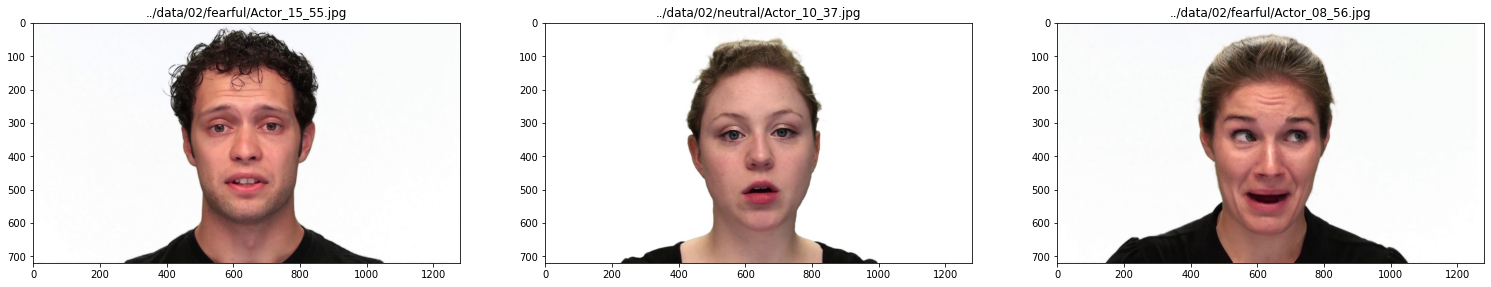

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(26, 10))

for i in range(3):
    file = all_files[randint(0, len(all_files) -1 )]
    image = mpimg.imread(file)
    ax = plt.subplot(1, 3, i + 1)
    plt.title(file)
    plt.imshow(image)
    
plt.show()